# Routines for plotting Boozer-coordinate data
The `booz_xform` python module includes several routines for plotting.
This notebook presents a gallery of the available plots. For the full API of the plotting functions,
see the [booz_xform documentation](https://hiddensymmetries.github.io/booz_xform/plotting.html).


The plotting functions take a `Booz_xform` instance as their first argument.
This object can be one which was used to drive the coordinate transformation, e.g.:

In [1]:
import booz_xform as bx
b1 = bx.Booz_xform()
b1.read_wout("../tests/test_files/wout_li383_1.4m.nc")
b1.compute_surfs = [47]
b1.run()

Alternatively, as shown in later sections, you can supply a string with the filename of a `boozmn_*.nc` file containing saved results from an earlier transformation.
Or, you can supply a `Booz_xform` instance in which results from an earlier
transformation were loaded using the `Booz_xform.read_boozmn()` function:

In [2]:
b2 = bx.Booz_xform()
b2.read_boozmn("../tests/test_files/boozmn_li383_1.4m_manySurfs.nc")

### Plots of |B| on a surface
The `surfplot` function displays |B| on a flux surface, as a function of the poloidal and toroidal Boozer angles. You supply the index of the surface among the list of surfaces for which the transformation was done (as opposed to the radial index into the *input* arrays.) For the full list of options, see the [surfplot documentation](https://hiddensymmetries.github.io/booz_xform/plotting.html#booz_xform.surfplot).

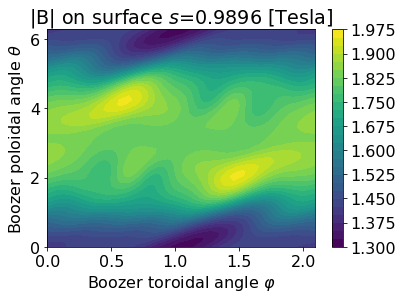

In [3]:
bx.surfplot(b1, js=0)

The first argument can also be a filename (a string) instead of a `Booz_xform` instance:

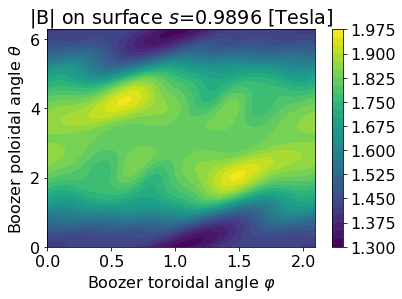

In [4]:
bx.surfplot("../tests/test_files/boozmn_li383_1.4m_manySurfs.nc", js=16)

You can generate lines instead of filled contours by setting `fill=False`. Also, extra arguments get passed to matplotlib's `contourf` or `contour` commands. This feature can be used to, for instance, change the colormap, or pick specific contour values. The full list of `contourf` and `contour` options can be found [in the matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html).

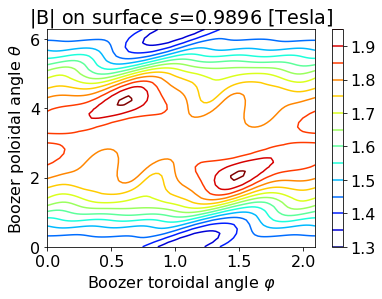

In [5]:
import numpy as np
import matplotlib.pyplot as plt
bx.surfplot(b1, js=0, fill=False, cmap=plt.cm.jet, levels=np.arange(1.3, 2.0, 0.05))

### Radial profiles
A variety of plots can be generated showing the Fourier mode amplitudes of |B| versus minor radius. There are two functions for this purpose, `modeplot` and `symplot`. The `modeplot` function displays a few Fourier modes, those with the largest magnitude at the edge, each with a different color and legend entry. The `symplot` function displays all modes (within some maximum $|m|$ and $|n|$), but with colors that highlight modes with $m=0$ or $n=0$.

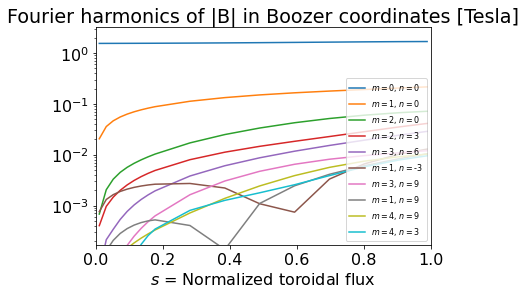

In [6]:
bx.modeplot(b2, legend_args={"fontsize":8})

The plotting functions have many options. If you wish, the $m=n=0$ mode can be suppressed by setting `B0=False`. The number of modes shown can be set by the `nmodes` argument. The $x$ axis can be either the normalized toroidal flux $s$, or it can be $\sqrt{s}$. The $y$ axis can be either linear or logarithmic.
For the full list of options, see the [modeplot documentation](https://hiddensymmetries.github.io/booz_xform/plotting.html#booz_xform.modeplot).

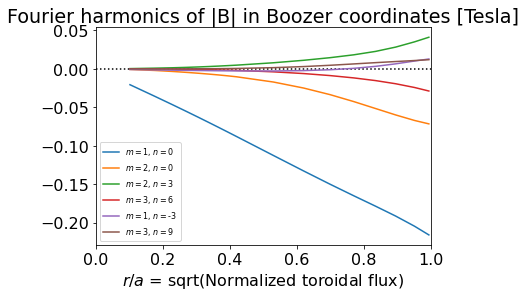

In [7]:
bx.modeplot(b2, B0=False, nmodes=6, 
            sqrts=True, log=False, legend_args={"fontsize":8})

As shown above, the first argument can be a filename rather than a `Booz_xform` object. Any extra arguments are passed to matplotlib's `plot` function. This feature can be used to adjust the line style. For the full list of options, see the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

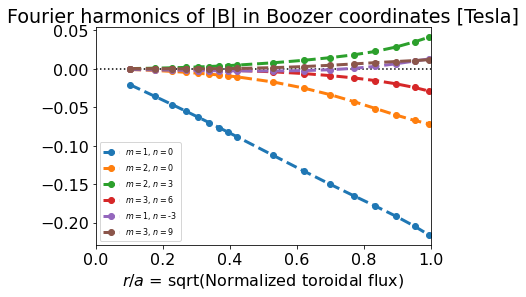

In [8]:
bx.modeplot("../tests/test_files/boozmn_li383_1.4m_manySurfs.nc",
            B0=False, nmodes=6, sqrts=True, log=False,
            legend_args={"fontsize":8}, linestyle='--',
            linewidth=3, marker="o")

The `symplot` function is quite similar to `modeplot`, except that the colors indicate whether each mode has $m=0$ or $n=0$. For both `symplot` and `modeplot`, any legend options can be passed to matplotlib using the `legend_args` option. For the full range of legend options, see the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

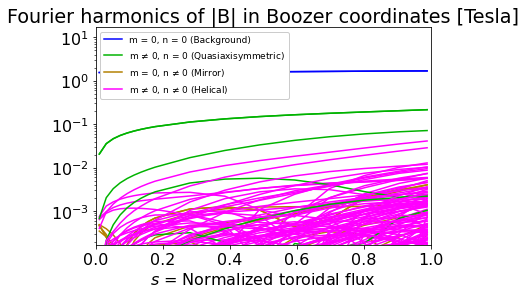

In [9]:
bx.symplot(b2, legend_args={"fontsize":9, "loc":"upper left", "framealpha": 1})

Many of the options of `symplot` and `modeplot` are common.
In particular, if you wish, the $m=n=0$ mode can be suppressed by setting `B0=False`. 
The $x$ axis can be either the normalized toroidal flux $s$, or it can be $\sqrt{s}$. 
The $y$ axis can be either linear or logarithmic.
For the full list of options, see the [symplot documentation](https://hiddensymmetries.github.io/booz_xform/plotting.html#booz_xform.symplot).
One difference is that `symplot` does not have a `nmodes` argument.

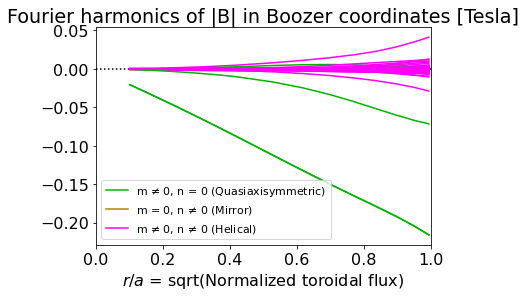

In [10]:
bx.symplot(b2, B0=False, sqrts=True, log=False, legend_args={"fontsize":11})

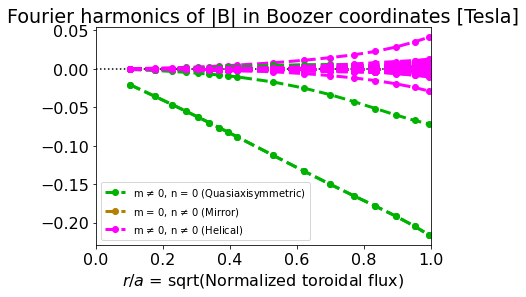

In [11]:
bx.symplot("../tests/test_files/boozmn_li383_1.4m_manySurfs.nc",
           B0=False, sqrts=True, log=False,
           legend_args={"fontsize":10}, linestyle='--',
           linewidth=3, marker="o")